## For this project you will visualize time series data using a line chart, bar chart, and box plots. 

## You will use `Pandas`, `Matplotlib`, and `Seaborn` to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03.

### The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Import data (Make sure to parse dates. Consider setting index column to `date`.)

In [4]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ['date'], index_col = 'date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [6]:
df = df[
  (df['value'] >= df['value'].quantile(0.025)) &  # Page views in the top 2.5% of the dataset
  (df['value'] <= df['value'].quantile(0.975))]   # Page views in the bottom 2.5% of the dataset

### Create a draw_line_plot function that uses Matplotlib to draw a line chart. 

### The title should be `Daily freeCodeCamp Forum Page Views 5/2016-12/2019`.

### The label on the "x" axis should be `Date` and the label on the "y" axis should be `Page Views`.

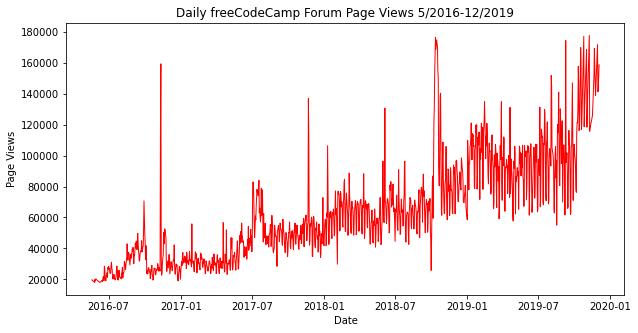

In [8]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df.index, df['value'], 'red', linewidth=1)

    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

draw_line_plot()

### Create a draw_bar_plot function that draws a bar chart. 

### It should show average daily page views for each month grouped by year.

### The legend should show month labels and have a title of `Months`. 

### On the chart, the label on the "x" axis should be `Years` and the label on the "y" axis should be `Average Page Views`.

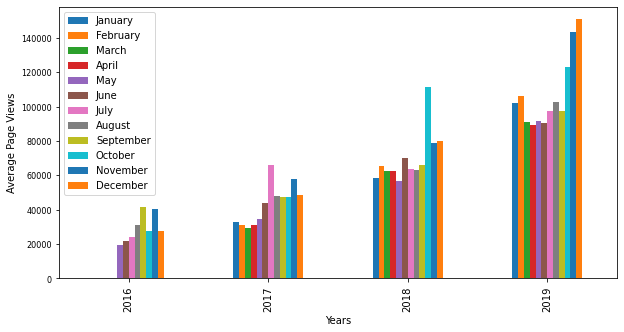

In [9]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df2 = df.copy()
    df2['month'] = df2.index.month
    df2['year'] = df2.index.year
    df_bar = df2.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()

    # Draw bar plot
    fig = df_bar.plot.bar(legend=True, figsize = (10, 5), ylabel = "Average Page Views", xlabel = 'Years').figure

    plt.legend(['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December'])
    
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 8)
    
draw_bar_plot()

### Create a draw_box_plot function that uses Searborn to draw two adjacent box plots. These box plots should show how the values are distributed within a given year or month and how it compares over time. 

### The title of the first chart should be `Year-wise Box Plot (Trend)` and the title of the second chart should be `Month-wise Box Plot (Seasonality)`. 

### Make sure the month labels on bottom start at `Jan` and the "x" and "y" axis are labeled correctly.

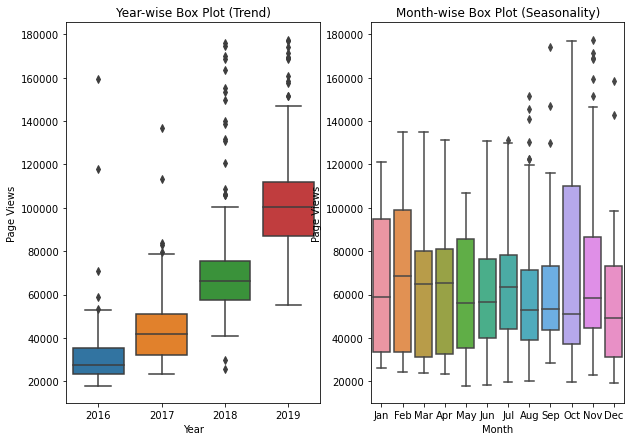

In [11]:
def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    # Draw box plots (using Seaborn)
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
    axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax = axes[0])
    axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax = axes[1])

    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')
    
draw_box_plot()